In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Removing unnecessary columns - day, month, year

In [7]:
df.drop(["day", "month", "year"],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Encoding classes column

In [8]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [9]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [10]:
df["Classes"] = df["Classes"].str.strip()
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [11]:
df["Classes"]= np.where(df["Classes"].str.contains("not fire"), 0, 1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


<Axes: >

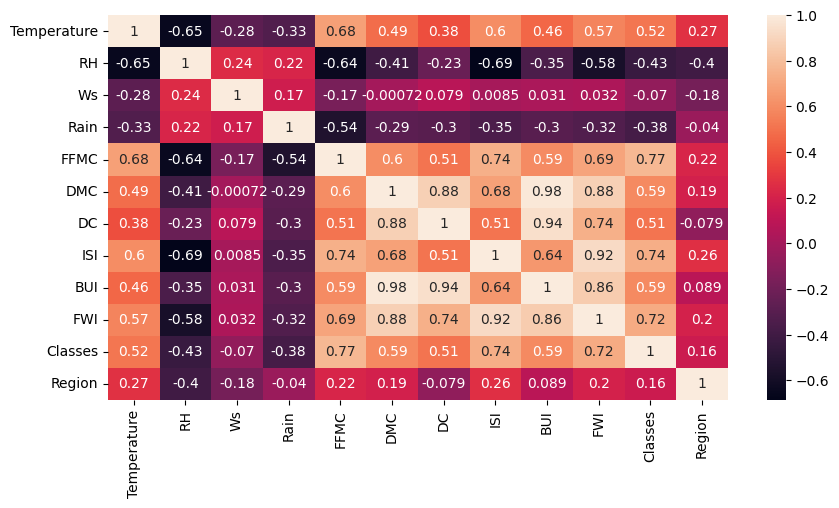

In [12]:
df.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(),annot=True)

Notable correlation-
BUI <> DMC - 0.98


In [13]:
corr_matrix = df.corr()
cols_above_85 = [
    (col1, col2)
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.85
]

cols_above_85

[('DMC', 'DC'),
 ('DMC', 'BUI'),
 ('DMC', 'FWI'),
 ('DC', 'DMC'),
 ('DC', 'BUI'),
 ('ISI', 'FWI'),
 ('BUI', 'DMC'),
 ('BUI', 'DC'),
 ('BUI', 'FWI'),
 ('FWI', 'DMC'),
 ('FWI', 'ISI'),
 ('FWI', 'BUI')]

In [14]:
def correlation (dataset, threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns [i]
              col_corr.add(colname)

    return col_corr

In [15]:
X = df.drop("FWI", axis = 1)
y = df["FWI"]

In [16]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [17]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [18]:
correlation(X, 0.85)

{'BUI', 'DC'}

In [19]:
X = X.drop(correlation(X, 0.85), axis = 1)

In [20]:
X.shape

(243, 9)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 9), (61, 9), (182,), (61,))

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Text(0.5, 1.0, 'X_train After scaling')

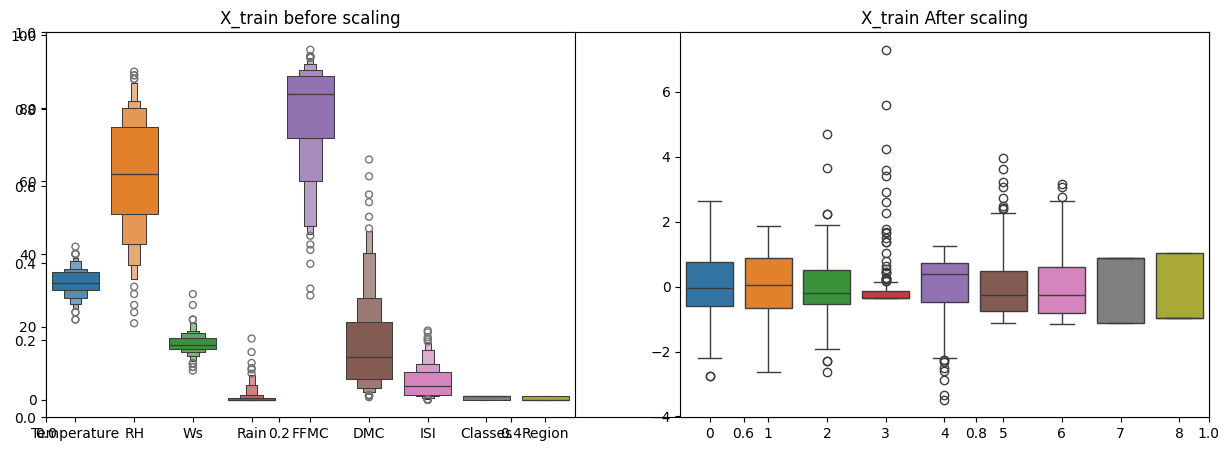

In [23]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxenplot(X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train After scaling")

In [24]:
#On scaled data
from sklearn.linear_model import LinearRegression
l_r= LinearRegression()
l_r.fit(X_train_scaled, y_train)
y_pred_train = l_r.predict(X_train_scaled)
y_pred_test = l_r.predict(X_test_scaled)
score_scaled = l_r.score(X_test_scaled, y_test)
score_scaled # R2 score
l_r.coef_

array([ 1.17314740e-04, -2.66051322e-01,  9.39193866e-02, -3.98918811e-02,
       -8.60802068e-01,  3.82853579e+00,  4.75578356e+00,  4.84719583e-01,
       -3.85637841e-01])

In [36]:
#On unscaled data
from sklearn.linear_model import LinearRegression
l_r= LinearRegression()
l_r.fit(X_train, y_train)
y_pred_train = l_r.predict(X_train)
y_pred_test = l_r.predict(X_test)
score_unscaled = l_r.score(X_test, y_test)
score_train = l_r.score(X_train, y_train)
print(score_train, score_unscaled)

0.9725430351083134 0.970397326654568


Scaling is not improving the score

Text(0, 0.5, 'Residuals')

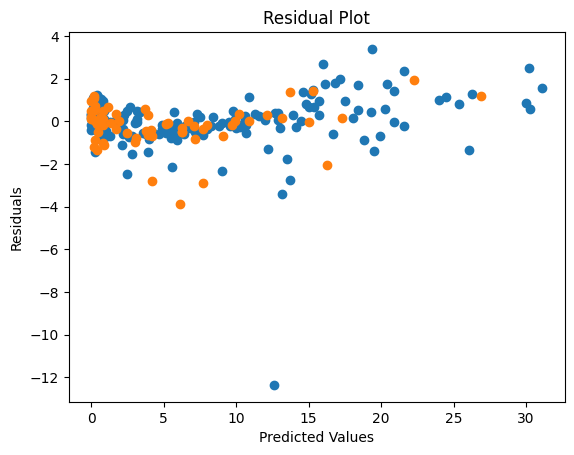

In [26]:
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test
plt.scatter(y_train, residual_train)
plt.scatter(y_test, residual_test)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

### Residual Plot is nearly random only except one outlier in test data (25, -12), we are not finding any trend in the residuals. Hence, our model is good.

## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)
score_lasso = lasso.score(X_test_scaled, y_test)
score_train_lasso = lasso.score(X_train_scaled, y_train)
print(score_lasso, score_train_lasso)

lasso.coef_

0.9654276158501789 0.9700319901030073


array([-0.        , -0.        ,  0.05594094,  0.        , -0.16672042,
        3.67727322,  4.69586371,  0.08813041, -0.23559972])

Text(0, 0.5, 'Residuals')

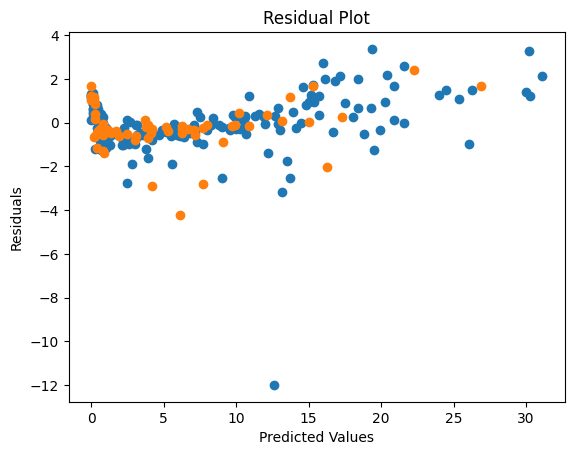

In [28]:
residual_train = y_train - y_pred_train_lasso
residual_test = y_test - y_pred_test_lasso
plt.scatter(y_train, residual_train)
plt.scatter(y_test, residual_test)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

## Ridge Regression Model

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_train_ridge = ridge.predict(X_train_scaled)
y_pred_test_ridge = ridge.predict(X_test_scaled)
score_ridge = ridge.score(X_test_scaled, y_test)
score_train_ridge = ridge.score(X_train_scaled, y_train)
print(score_ridge, score_train_ridge)
ridge.coef_

0.969205102211881 0.9724954757742625


array([ 0.01229293, -0.29483224,  0.11600892, -0.03222551, -0.81809932,
        3.8101362 ,  4.6597755 ,  0.51725667, -0.37933811])

## Elastic Net Regularization

In [39]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 1, l1_ratio= 0.8)
elastic.fit(X_train_scaled, y_train)
y_pred_train_elastic = elastic.predict(X_train_scaled)
y_pred_test_elastic = elastic.predict(X_test_scaled)
score_elastic = elastic.score(X_test_scaled, y_test)
score_train_elastic = elastic.score(X_train_scaled, y_train)
print(score_elastic, score_train_elastic)
#elastic.coef_

0.9073532926918266 0.9251368705176
